#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen y convierte a RGB

(938, 473, 3)


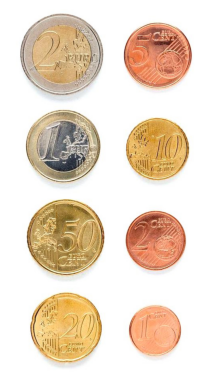

In [16]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

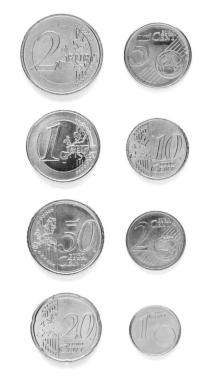

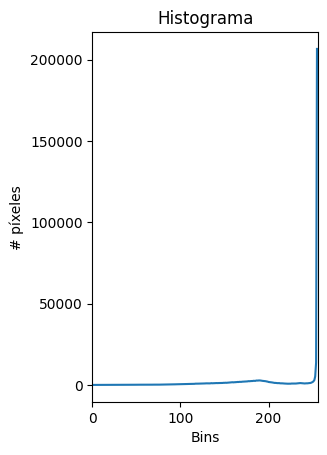

In [17]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

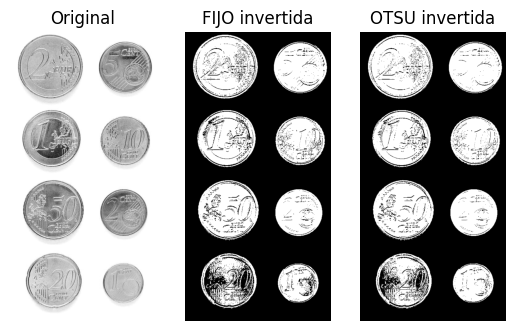

In [18]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


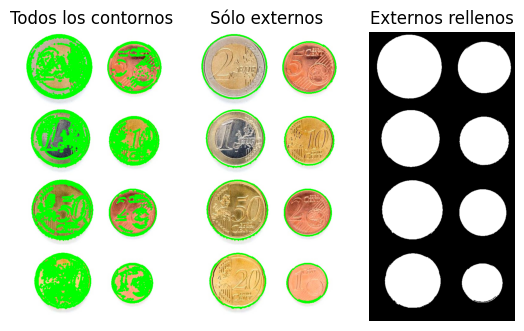

In [24]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Monedas:8
Diametros:[31.039494978528214, 42.70783237449291, 35.97666701574102, 46.3537740137164, 37.716455179595044, 44.455775806621716, 40.52270316499037, 49.64114680582107]


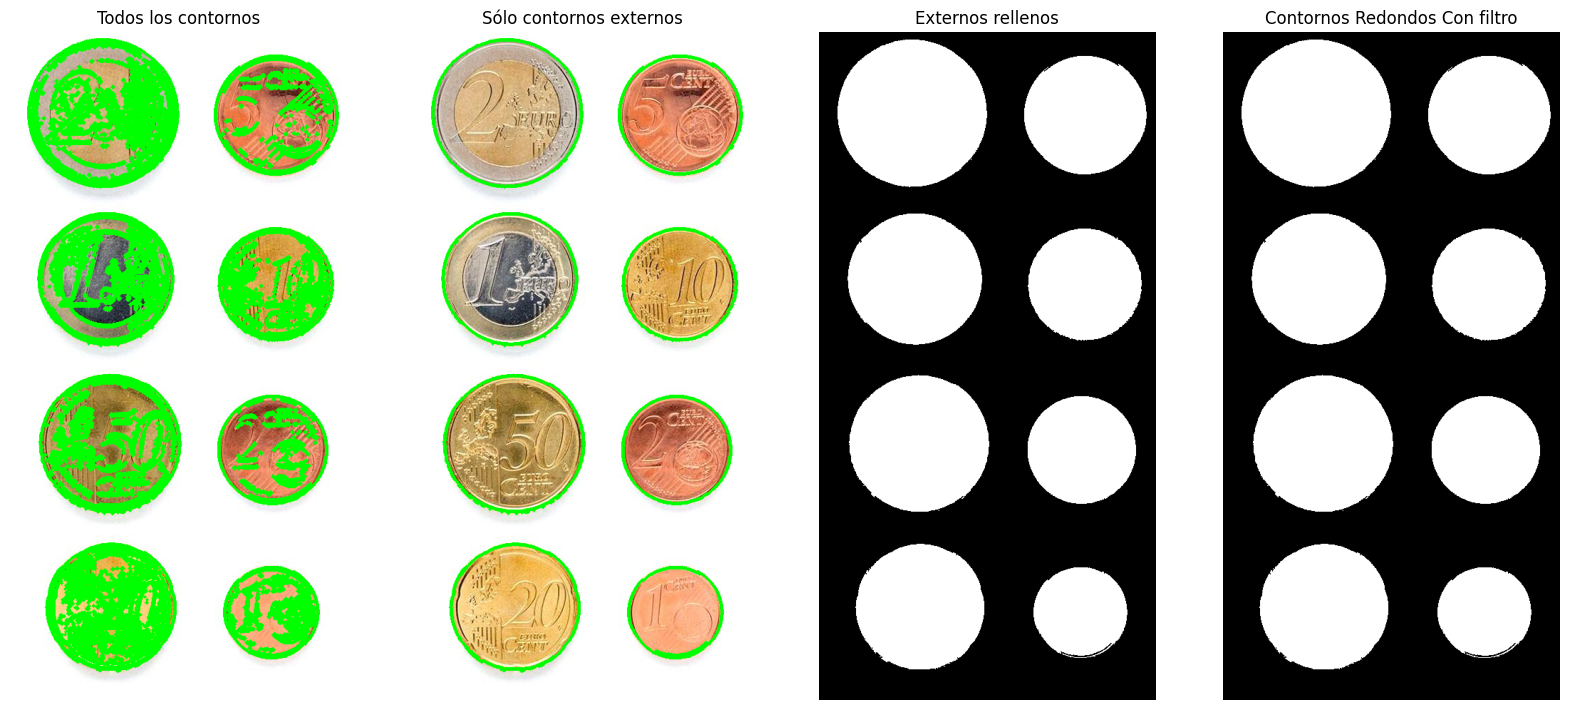

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Leer la imagen
img = cv2.imread('Monedas.jpg')  # Reemplaza 'tu_imagen.png' por la ruta de tu imagen
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbral para obtener una imagen binaria
_,img_th1 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)


# Encontrar todos los contornos (externos e internos)
#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos externos/internos en la imagen original
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0, 255, 0), 3)

plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura aquí

plt.subplot(141)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Todos los contornos')

# Dibujar solo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0, 255, 0), 3)

plt.subplot(142)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Sólo contornos externos')

# Dibujar contornos externos rellenos en una imagen vacía
img_cont = np.zeros(img_rgb.shape)
contornos_redondos = []
valores_monedas_lista = []

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)

        ##################       Filtrado de Monedas
        # Calcular la relación entre el área y el cuadrado del perímetro
        relacion_redondez = (4 * np.pi * area) / (perimetro ** 2)

        # Define un umbral para considerar que un contorno es redondo
        umbral_redondez = 0.4  # Ajusta este valor según tus necesidades
        #0.4 para imagen original
        if relacion_redondez > umbral_redondez:
            contornos_redondos.append(c)

            # Determinar el valor de la moneda en función de su diámetro
            # Encuentra el círculo que mejor se ajusta al contorno
            (x, y), radio = cv2.minEnclosingCircle(c)

            # Calcula el diámetro a partir del radio
            diametro = 2 * radio
            valores_monedas_lista.append(diametro)



        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)



#Contorno externo relleno
plt.subplot(143)
plt.axis("off")
plt.imshow(img_cont)
plt.title('Externos rellenos')



# Dibuja los contornos redondos en una nueva imagen
img_cont_redondos = np.zeros(img_rgb.shape)
cv2.drawContours(img_cont_redondos, contornos_redondos, -1, (255, 255, 255), -1)

plt.subplot(144)
plt.axis("off")
plt.imshow(img_cont_redondos)
plt.title('Contornos Redondos Con filtro')



# Multiplica cada valor en valores_monedas_lista por la escala
for i in range(len(valores_monedas_lista)):
    valores_monedas_lista[i] *= escala





print("Monedas:" + str(len(valores_monedas_lista)))
print("Diametros:" + str(valores_monedas_lista))

plt.show()

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


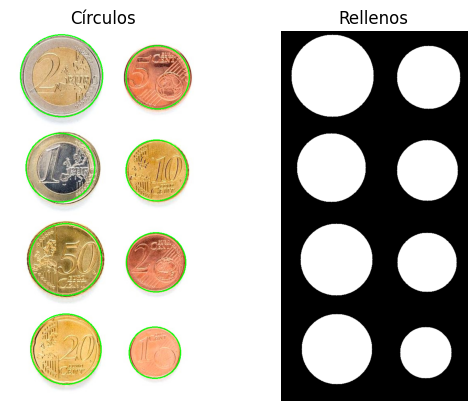

In [19]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Diámetro de la moneda seleccionada: 140.66427612304688 px
Escala actualizada: 24.2 / 140.66427612304688 = 0.1723962946980737
Monedas:6
Diametros:[24.25, 22.212353450761473, 38.41192577615583, 22.0937968008935, 19.500941902728123, 39.140067053754734]
Valores Monedas: [0.5, 0.2, 2.0, 0.2, 0.1, 2.0]
Valor Total: 5.0


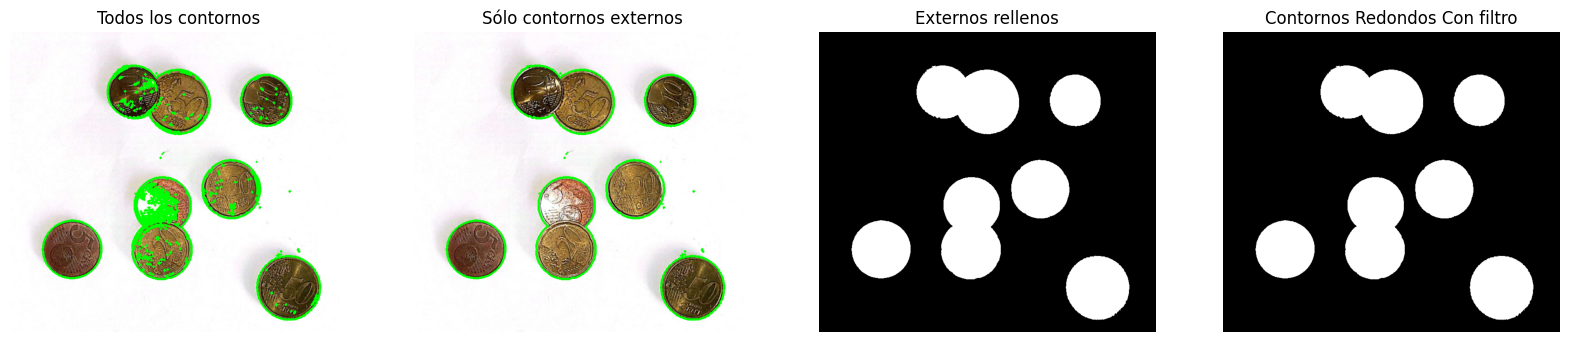

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def seleccionar_moneda(event, x, y, flags, param):
    global escala
    if event == cv2.EVENT_LBUTTONDOWN:
        for c in contornos_redondos:
            # Encuentra el círculo que mejor se ajusta al contorno
            (centro_x, centro_y), radio = cv2.minEnclosingCircle(c)
            # Calcula la distancia entre el punto de clic y el centro del círculo
            distancia = np.sqrt((x - centro_x) ** 2 + (y - centro_y) ** 2)

            # Si el punto de clic está dentro del círculo
            if distancia < radio:
                diametro = 2 * radio
                escala = 24.25 / diametro #50 centimos
                print(f"Diámetro de la moneda seleccionada: {diametro} px")
                print(f"Escala actualizada: 24.2 / {diametro} = {escala}")
                break

# Leer la imagen
#img = cv2.imread('MonedasConObjetoSinSolape3.jpg')  # IMAGEN NO SOLAPADA
#img = cv2.imread('Monedas.jpg')  # IMAGEN NO SOLAPADA
img = cv2.imread('MonedasConSolape.jpg')  # IMAGEN SOLAPADA


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbral para obtener una imagen binaria
_,img_th1 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)


# Encontrar todos los contornos (externos e internos)
#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos externos/internos en la imagen original
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0, 255, 0), 3)

plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura aquí

plt.subplot(141)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Todos los contornos')

# Dibujar solo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0, 255, 0), 3)

plt.subplot(142)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Sólo contornos externos')

# Dibujar contornos externos rellenos en una imagen vacía
img_cont = np.zeros(img_rgb.shape)
contornos_redondos = []
valores_monedas_lista = []

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)

        ##################       Filtrado de Monedas
        # Calcular la relación entre el área y el cuadrado del perímetro
        relacion_redondez = (4 * np.pi * area) / (perimetro ** 2)



        # Define un umbral para considerar que un contorno es redondo
        umbral_redondez = 0.4  # Ajusta este valor según tus necesidades
        #0.4 para imagen original
        #0.65 imagen




        if relacion_redondez > umbral_redondez:
            contornos_redondos.append(c)

            # Determinar el valor de la moneda en función de su diámetro
            # Encuentra el círculo que mejor se ajusta al contorno
            (x, y), radio = cv2.minEnclosingCircle(c)

            # Calcula el diámetro a partir del radio
            diametro = 2 * radio
            valores_monedas_lista.append(diametro)



        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)



#Contorno externo relleno
plt.subplot(143)
plt.axis("off")
plt.imshow(img_cont)
plt.title('Externos rellenos')



# Dibuja los contornos redondos en una nueva imagen
img_cont_redondos = np.zeros(img_rgb.shape)
cv2.drawContours(img_cont_redondos, contornos_redondos, -1, (255, 255, 255), -1)

plt.subplot(144)
plt.axis("off")
plt.imshow(img_cont_redondos)
plt.title('Contornos Redondos Con filtro')


cv2.imshow('Selecciona una moneda', img_rgb)

cv2.setMouseCallback('Selecciona una moneda', seleccionar_moneda)
########################
while True:
    cv2.imshow('Selecciona una moneda', img_rgb)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Presiona la tecla Esc para salir
        break
######################
cv2.destroyAllWindows()

# Multiplica cada valor en valores_monedas_lista por la escala
for i in range(len(valores_monedas_lista)):
    valores_monedas_lista[i] *= escala


valores_monedas = { #DIAMTRO MM : VALOR
    16.26: 0.01,
    18.75: 0.02,
    21.25: 0.05,  
    19.75: 0.1,  
    22.25: 0.2,  
    24.25: 0.5,
    23.25: 1.0,
    25.75: 2.0
}

valores_correspondientes = []

for diametro in valores_monedas_lista:
    # Encuentra la escala (diámetro) más cercana en el diccionario
    escala_mas_cercana = min(valores_monedas, key=lambda x: abs(x - diametro))
    valor_correspondiente = valores_monedas[escala_mas_cercana]
    valores_correspondientes.append(valor_correspondiente)



print("Monedas:" + str(len(valores_monedas_lista)))
print("Diametros:" + str(valores_monedas_lista))
print(f"Valores Monedas: {valores_correspondientes}")
print(f"Valor Total: {sum(valores_correspondientes)}")
plt.show()

Principales Problemas:
<ul>
<li>1.Dependencia de la Precision Debido a la Calidad de la Imagen</li>
<li>2.Identificacion Individual de Objetos Solapados</li>
</ul>

Clasificación de microplásticos

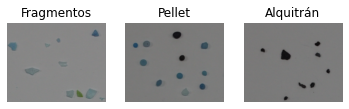

In [10]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

Accuracy (TP/(n))= 0.33
Precision (TP/(TP+FP)) = 0.33209980237154146
Recall (TP/(TP+FN)) = 0.33
F1 Score (2*(precision*recall)/(precision+recall)) = 0.329899414311179


Text(27.5, 0.5, 'Anotada')

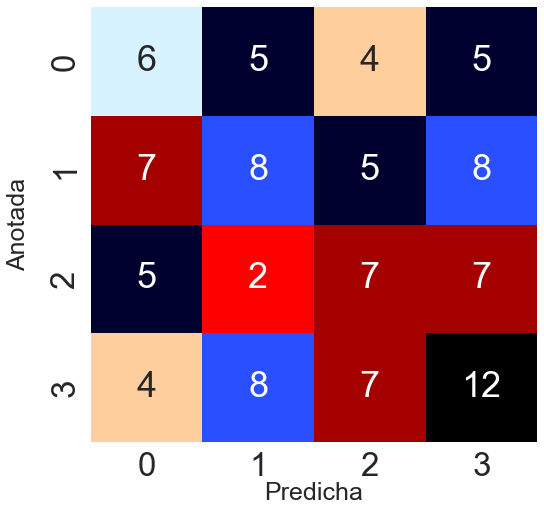

In [15]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)